# Fig.2, stimulating complete neuron model with noisy input

## Importing useful functions and packages

In [1]:
### Importing useful packages
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from matplotlib.pylab import *
from matplotlib import rc
from scipy.optimize import curve_fit
from copy import copy
from matplotlib import rc
import matplotlib.ticker as ticker

In [2]:
### defining global variables
global delta_t, thresh, resol, sp_window, time_stim, precision_convergence_ss
precision_convergence_ss=0.00001
thresh=-30 #mV
resol=0.01#ms (min resolution of integration)
delta_t=resol #ms
sp_window=2
time_stim=1000

In [3]:
######Importing useful functions
exec(open("./functions/f_stimulations_simulations.py").read())
exec(open("./functions/f_post_simulation_analysis.py").read())
exec(open("./functions/f_plots.py").read())
exec(open("./functions/f_saving_plots.py").read())

## Defining neuron-model 

In [4]:
####### Model to Analyze
s_model_abrev="MTM_W_sPNaS_sICD"
s_model="neuron_"+s_model_abrev
exec(open("./cfg/m_"+s_model_abrev+".py").read())


In [5]:
### Creating neuron instance of class defined in "s_model"
d_Pars=eval("Pars_"+s_model_abrev)
identifier = getattr(sys.modules[__name__], s_model)
neuron2=identifier(d_Pars)


In [6]:
## Defining dir 2 save figs
dir_figs='./figs/'

## Defining stimulation protocol

In [7]:
#######################################################################################
#######################################################################################
#######################################################################################
##########Fig. 2 Noisy stimulus.. #######################

n_cof=500# cutoff frequency of white noise
n_mean=1.0#uA/cm2 noise mean
n_amp=1.0#uA/cm2 noise amplitude
t_st_stim=2.0#ms time of stimulus start
time_stim=10000.0#ms end of stimulus end

#######################################################################################
#######################################################################################
#######################################################################################
#######################################################################################
########## Setting initial conditions... #########################################################
K_o_ini=12.0
Na_i_ini=7.0
K_i_ini=150.71

i_sn=[ii for ii,i_s in enumerate(neuron2.s_state_vars) if i_s=='K_o'][0]
neuron2.current_state[i_sn]=K_o_ini
K_o=neuron2.current_state[i_sn]
print(K_o)

i_sn=[ii for ii,i_s in enumerate(neuron2.s_state_vars) if i_s=='Na_i'][0]
neuron2.current_state[i_sn]=Na_i_ini
Na_i=neuron2.current_state[i_sn]
print(Na_i)

i_sn=[ii for ii,i_s in enumerate(neuron2.s_state_vars) if i_s=='K_i'][0]
neuron2.current_state[i_sn]=K_i_ini
K_i=neuron2.current_state[i_sn]
print(K_i)


12.0
7.0
150.71


In [8]:
sim=noisy_current_simulation_var(neuron2,n_mean,n_amp,n_cof,time_stim,interval0=10.0,compress=[])

/home/contreras/anaconda2/envs/AUTO_py37/lib/python3.7/site-packages/ipykernel_launcher.py:506: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/contreras/anaconda2/envs/AUTO_py37/lib/python3.7/site-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


## Visualizing simulation

In [9]:
# #######################################################################################
# ##########3 Figure cfg format PLOS.. #######################
# #######################################################################################
import json
P= json.load(open("cfg/PLOSmpl.json")) # import plot parameter
matplotlib.rcParams.update([(j,k) for (j,k) in P.items()
                            if j in matplotlib.rcParams.keys()])

0
E_Na
1
E_K


/home/contreras/anaconda2/envs/AUTO_py37/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/contreras/anaconda2/envs/AUTO_py37/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/contreras/anaconda2/envs/AUTO_py37/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/contreras/anaconda2/envs/AUTO_py37/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied.

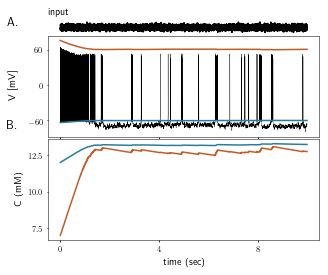

In [10]:
# #######################################################################################
# ##########3 Figure cfg.. #######################
# #######################################################################################
f1 = plt.figure(facecolor="1")

ax=[]
ax.append(plt.subplot2grid((15, 1), (0, 0), rowspan=1))
ax.append(plt.subplot2grid((15, 1), (1, 0), rowspan=7, sharex=ax[0]))
ax.append(plt.subplot2grid((15, 1), (8, 0), rowspan=7, sharex=ax[0]))

############################################
##### Plot Stimulus
##############################################3
exec(sim.d_Protocol['s_Executable_stimulus'])
I=[I_exp1(i)  for i in sim.a_Results.t]
c=[0,0,0]## Defines color
ax[0].plot(sim.a_Results.t/1000.0, I,color=c,rasterized=True)

## removing axes of stimulus
ax[0].spines['bottom'].set_color('white')
ax[0].spines['top'].set_color('white')
ax[0].spines['left'].set_color('white')
ax[0].spines['right'].set_color('white')
for t in ax[0].xaxis.get_ticklines(): t.set_color('white')
for t in ax[0].yaxis.get_ticklines(): t.set_color('white')
ax[0].set_title('input', loc='left')
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)

############################################
#### Plot voltage trace
############################################
ax[1].plot(sim.a_Results.t/1000.0,sim.a_Results.V,color=c,linewidth=matplotlib.rcParams['lines.linewidth']*0.2)
ax[1].set_ylabel(r'V [mV]',labelpad=10)
## managing ticks
locatory = ticker.MaxNLocator(nbins=3) # with 3 bins you will have 4 ticks
ax[1].yaxis.set_major_locator(locatory)
locatorx = ticker.MaxNLocator(nbins=3) # with 3 bins you will have 4 ticks
ax[1].xaxis.set_major_locator(locatorx)
############################################
##### Plot nernst potentials #####
############################################
E_vv=[]
E_vv=[]
c=0
for i in sim.a_Results.t:
	inst_state= [None] * len(sim.c_neuron.s_state_vars)
	cc=0
	for j in sim.c_neuron.s_state_vars:
	    inst_state[cc]=(getattr(sim.a_Results,j)[c])
	    cc+=1
	E_vv.append(sim.c_neuron.resting_membrane_potentials(inst_state))
	c+=1

E_vm=matrix(E_vv)
c=0
for j in sim.c_neuron.s_resting_membrane_potentials:
	if j=='E_K':
		ax[1].plot(sim.a_Results.t/1000.0, E_vm[:,c],color=[0.141, 0.49, 0.612],label='$'+j+'$',rasterized=True)
		print(c)
		print(j)
	if j=='E_Na':
		ax[1].plot(sim.a_Results.t/1000.0, E_vm[:,c],color=[0.773, 0.353, 0.145],label='$'+'E_{Na}'+'$',rasterized=True)
		print(c)
		print(j)
	c+=1
        
############################################    
# ##### Plot ionic concentrations
############################################
v_concs=['K_o','Na_i']
for i in v_concs:
    if i=='Na_i':
        ax[2].plot(sim.a_Results.t/1000.0, getattr(sim.a_Results,i),color=[0.773, 0.353, 0.145],label='$'+i+'$',rasterized=True)
    if i=='K_o':
        ax[2].plot(sim.a_Results.t/1000.0, getattr(sim.a_Results,i),color=[0.141, 0.49, 0.612],label='$'+i+'$',rasterized=True)

###### Make fonts bigger,
ylbl2=ax[2].set_ylabel(r'C (mM)')
ax[2].set_xlabel(r'time (sec)')
###### and adding legend
locatory2 = ticker.MaxNLocator(nbins=3) # with 3 bins you will have 4 ticks
ax[2].yaxis.set_major_locator(locatory2)
        
        
import string
for n, axs in enumerate(ax[1:]):   
    axs.text(-0.15, 1.1, string.ascii_uppercase[n]+'.', transform=axs.transAxes, 
            size=12, weight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.8,right=0.85)

plt.show()